In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# plt.style.use('dark_background')
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

In [2]:
cols = ['Survived','Pclass','Sex','Age','SibSp','Embarked']
df= pd.read_csv('titanic_sample.csv',usecols = cols)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Embarked
0,1,3,female,1.0,0,C
1,1,2,male,NaN,0,S
2,1,1,female,NaN,1,S
3,1,1,male,40.0,0,C
4,0,2,male,34.0,0,S


# Group By: Splitting data into groups -groupby

With pandas, we could naturally group by columns values. For that we call:

groupby() function returns a GroupBy object.

In [8]:
grouped  = df.groupby('Sex')
grouped.first()

,Survived,Pclass,Age,SibSp,Embarked
Sex,,,,,
female,1,3,1.0,0,C
male,1,2,40.0,0,S


# Group By: split data apply function
 

DataFrameGroupBy object, is an indexing scheme of the data frame. It don't have the methods of data frame as info, columns etc. To get the values we need, we apply an aggregation function, as mean() or sum(), that returns DataFrame object.

groupby().mean() returns a DataFrame object

In [23]:
df.groupby('Sex').mean()

,Survived,Pclass,Age,SibSp
Sex,,,,
female,0.734694,2.132653,27.325949,0.744898
male,0.198020,2.376238,30.983774,0.435644


To use sex as a column,use reset_index.

In [22]:
df.groupby('Sex').sum().reset_index()

,Sex,Survived,Pclass,Age,SibSp
0,female,72,209,2158.75,73
1,male,40,480,4926.42,88


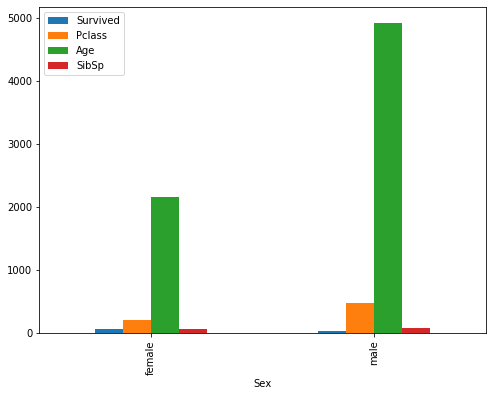

In [12]:
df.groupby('Sex').sum().plot(kind='bar', figsize=(8, 6))

In [28]:
df

,Survived,Pclass,Sex,Age,SibSp,Embarked
0,1,3,female,1.0,0,C
1,1,2,male,NaN,0,S
2,1,1,female,NaN,1,S
3,1,1,male,40.0,0,C
4,0,2,male,34.0,0,S
5,1,1,female,19.0,1,C
6,0,3,male,19.0,0,S
7,0,1,male,NaN,0,S
8,0,3,male,26.0,0,S
9,0,2,male,33.0,0,S


# Group by more then one column

In [30]:
df.groupby(['Sex', 'Survived'] ).count()

Pclass  Age  SibSp  Embarked
Sex    Survived                              
female 0             26   20     26        26
       1             72   59     72        72
male   0            162  126    162       162
       1             40   33     40        40

In [26]:
df.groupby(['Sex', 'Survived'] )['Survived'].count()

Sex     Survived
female  0            26
        1            72
male    0           162
        1            40
Name: Survived, dtype: int64

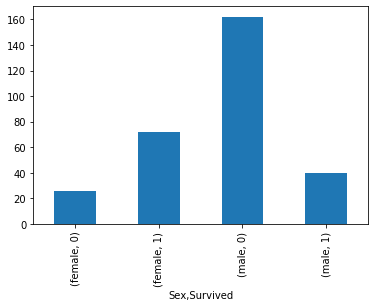

In [32]:
df.groupby(['Sex', 'Survived'] )['Survived'].count().plot.bar()

# Flatten after groupby

unstack method turns index values into column names.

In [33]:
df.groupby(['Sex', 'Survived'] )['Survived'].count().unstack('Sex')

Sex,female,male
Survived,,
0,26,162
1,72,40


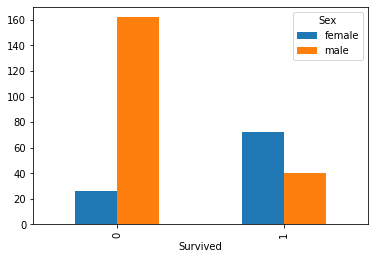

In [34]:
df.groupby(['Sex', 'Survived'] )['Survived'].count().unstack('Sex').plot.bar()

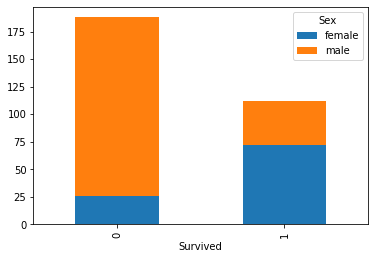

In [35]:
df.groupby(['Sex', 'Survived'] )['Survived'].count().unstack('Sex').plot.bar(stacked = True)

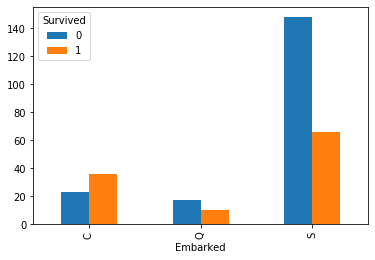

In [36]:
df.groupby(['Embarked', 'Survived'] )['Survived'].count().unstack('Survived').plot.bar()

In [37]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Embarked
0,1,3,female,1.0,0,C
1,1,2,male,NaN,0,S
2,1,1,female,NaN,1,S
3,1,1,male,40.0,0,C
4,0,2,male,34.0,0,S


# Crosstab vs GroupBy

In [40]:
df.groupby(['Survived', 'Sex']).count()

Pclass  Age  SibSp  Embarked
Survived Sex                                 
0        female      26   20     26        26
         male       162  126    162       162
1        female      72   59     72        72
         male        40   33     40        40

In [38]:
pd.crosstab(df.Sex, df.Survived, margins=True)

Survived,0,1,All
Sex,,,
female,26,72,98
male,162,40,202
All,188,112,300
